We begin by loading all necessary libraries and the telco dataset

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [241]:
telco = pd.read_csv(r"C:\Users\PRISCILLA\Downloads\Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

Data Exploratory analysis

In [242]:
telco.shape

(7043, 21)

In [243]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [244]:
# Check for missing values
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are No missing values

In [245]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Majority of the features are object or categorical in nature. 
In the next step i convert all categorical data to binary using the Label encoder

In [246]:
# we first drop the customer id column since its only mean for identification
g = telco['customerID'] 

In [247]:
tel = telco.drop ( columns = 'customerID')

In [248]:
tel.shape

(7043, 20)

In [249]:
tel.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [250]:
tel['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [251]:
# Library required for converting categorical data into binary
from sklearn.preprocessing import LabelEncoder

In [252]:
cols = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
        'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
for i in cols:
    tel[i] = le.fit_transform(list(tel[i]))

In [253]:
# Target column
tel['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [254]:
tel.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [255]:
# All columns formally with an object Dtype have been converted to numerical (int64)
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Divinding data set into x and y variables where x = features and y = target variable

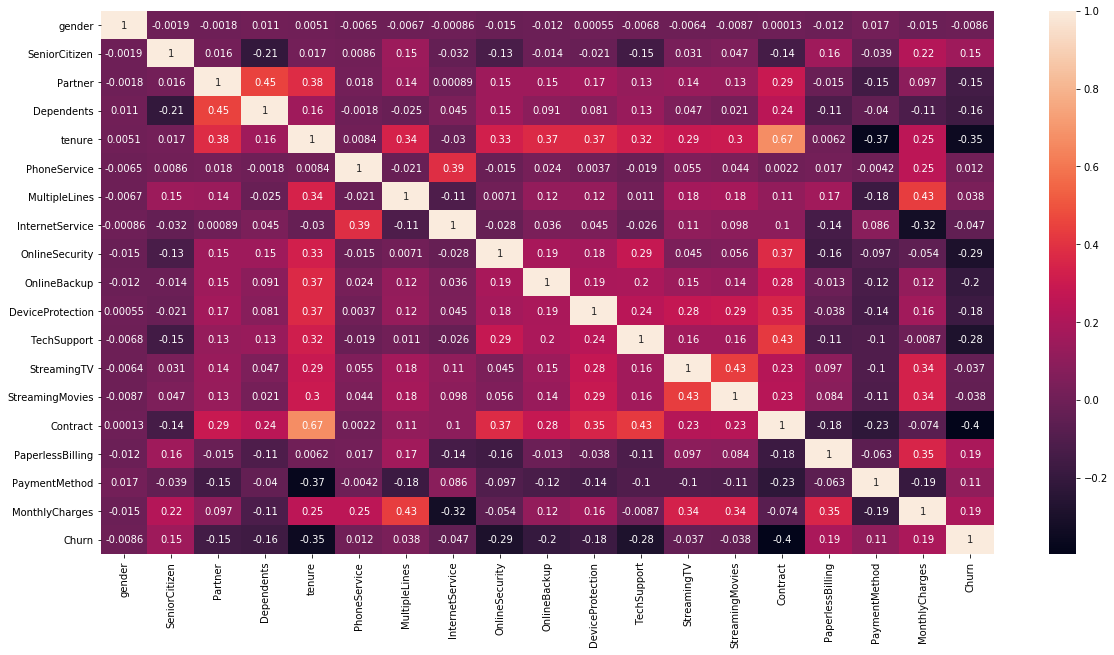

In [256]:
telcorr = tel.corr()
fig = plt.subplots( figsize = (20,10))
sns.heatmap(telcorr, annot = True)
plt.show()

In [257]:
x =tel.iloc[:,0:18]
y = tel.iloc[:,19]

# Using a Univariate feature Selection 

we identify the top 10 features with the highest score in relation to the target variable (churn)

In [258]:
# Libraries required for univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [259]:
# Using the SelectKBest for feature selection the top features are selected
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
4             tenure  16278.923685
17    MonthlyCharges   3680.787699
14          Contract   1115.780167
8     OnlineSecurity    551.611529
11       TechSupport    523.303866
9       OnlineBackup    230.086520
10  DeviceProtection    191.303140
1      SeniorCitizen    134.351545
3         Dependents    133.036443
15  PaperlessBilling    105.680863


# Using Feature Importance Method

[0.04072969 0.02726815 0.03261196 0.02646448 0.21539049 0.00729818
 0.02920795 0.03563166 0.04634649 0.03494441 0.03100488 0.04359413
 0.02415677 0.02472317 0.07792013 0.03232405 0.07306358 0.19731984]


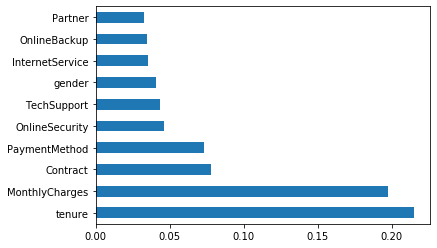

In [260]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [228]:
#X = x.drop ( columns = ['SeniorCitizen','Dependents','PhoneService','MultipleLines','DeviceProtection','StreamingTV','StreamingMovies','PaperlessBilling'])

we use standard scaler to scale the features between a value of 0 and 1

In [261]:
from sklearn.preprocessing import StandardScaler

In [262]:
s = StandardScaler()
x = s.fit_transform(x)

# splitting the dataset

In [263]:
# splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [264]:
# Using a Logistic Regression model from the sklearn library
from sklearn.linear_model import LogisticRegression

In [266]:
# let the model predict results
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x)
y_prob = log.predict_proba(x)[:,1]

In [267]:
tel['predictions'] = y_pred
tel['probabilities'] = y_prob

In [268]:
tel['CustomerID'] = g


In [269]:
tel.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predictions,probabilities,CustomerID
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,1,0.529083,7590-VHVEG
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.5,0,0,0.062929,5575-GNVDE
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,0,0.318833,3668-QPYBK
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,0,0.041519,7795-CFOCW
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,1,0.658651,9237-HQITU


In [66]:
#EXPORT IN CSV Format
# tel.to_csv(r'C:\Users\PRISCILLA\Downloads\Customer Churn\tel predicted.csv', index = False)

In [270]:
tel['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [271]:
tel['predictions'].value_counts()

0    5507
1    1536
Name: predictions, dtype: int64

In [272]:
from sklearn.metrics import confusion_matrix


In [275]:
y_pred = log.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79
